In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('survey.csv')
print(df.shape)
print(df.head())

(1259, 27)
             Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                   

Após a execução das linhas acima, observamos que temos, 1259 linhas, que são a quantidade de pessoas que participaram da entrevista e 27 colunas que são a quantidade de perguntas.

Em sequência temos a exibição dos 5 primeiros valores da tabela.

In [4]:
media = df['Age'].mean()
media

79428148.31135821

Fazemos uma tentativa de calcular a média da idade das pessoas que participaram da entrevista, mas temos um valor absurdo na saída, vamos tentar descobrir o porque.

In [5]:
df_sorted = df.sort_values(by='Age', ascending=False)
maiores_idades = df_sorted.head(5)
maiores_idades

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
390,2014-08-27 15:24:47,99999999999,All,Zimbabwe,NaN,Yes,Yes,Yes,Often,1-5,...,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes,NaN
364,2014-08-27 15:05:21,329,Male,United States,OH,No,No,Yes,Often,6-25,...,Don't know,Maybe,No,Some of them,No,No,No,No,No,NaN
1182,2014-10-02 21:25:16,72,Female,United States,IN,No,Yes,Yes,Never,500-1000,...,Somewhat easy,Maybe,Maybe,Some of them,Yes,No,No,Don't know,Yes,NaN
560,2014-08-27 19:17:07,65,Male,United States,FL,Yes,No,No,NaN,6-25,...,Very easy,Maybe,No,Some of them,No,No,No,Yes,No,NaN
520,2014-08-27 17:12:01,62,M,United States,CA,No,No,No,Never,More than 1000,...,Don't know,Maybe,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN


Após exibirmos as pessoas com as maiores idades, vemos que temos duas pessoas com valores exurbitantes.

In [6]:
df = df[df['Age'] <= 100]


Vamos verificar agora as menores idades, afim de remover valores absurdos

In [7]:
df_sorted = df.sort_values(by='Age', ascending=True)

menores_idades = df_sorted.head(5)
menores_idades

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
715,2014-08-28 10:07:53,-1726,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,...,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No,NaN
143,2014-08-27 12:39:14,-29,Male,United States,MN,No,No,No,NaN,More than 1000,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
1127,2014-08-30 20:55:11,-1,p,United States,AL,Yes,Yes,Yes,Often,1-5,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,password: testered
734,2014-08-28 10:35:55,5,Male,United States,OH,No,No,No,NaN,100-500,...,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No,We had a developer suffer from depression and ...
989,2014-08-29 09:10:58,8,A little about you,"Bahamas, The",IL,Yes,Yes,Yes,Often,1-5,...,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,


Observamos que existem pessoas com idades negativas, e menores de idade, devido a base de dados se tratar sobre pessoas adultas a idade não pode ser menor que 18. Removendo esses valores:

In [8]:
df = df[(df['Age'] >= 0) & (df['Age'] >= 18)]


In [9]:
media = df['Age'].mean()
media

32.07673860911271

Obtemos agora uma média mais próxima da realidade.

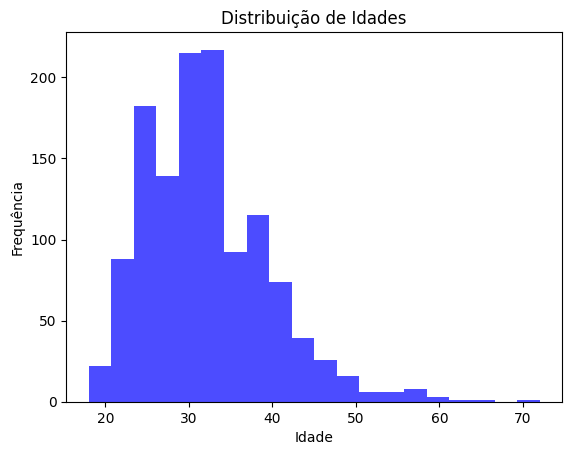

In [10]:
import matplotlib.pyplot as plt

plt.hist(df['Age'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição de Idades')

plt.show()


A maior parte das pessoas que responderam a pesquisa tem entre 20 a 40 anos de idade

In [11]:
contagem_genero = df['Gender'].value_counts()

contagem_genero


Gender
Male                                              612
male                                              204
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Woman                                               3
Male                                                3
Female                                              2
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Malr                                                1
Trans woman                                         1
male leaning androgynous                            1
Cis Man              

Observa-se que existem algumas formas de representar o mesmo sexo que foram separadas de maneira diferente, como por exemplo male e Male

In [12]:

# Criar uma função para mapear os gêneros
def mapear_genero(valor):
    valor = str(valor).strip().lower()
    if valor in ['male', 'm', 'man', 'make', 'malr', 'mail', 'maile', 'mal', 'guy (-ish) ^_^', 'enby', 'androgyne', 'male-ish', 'cis male', 'cis man', 'msle', 'trans-female', 'male (cis)', 'nah', 'ostensibly male, unsure what that really means', 'fluid', 'cis male', 'something kinda male?', 'genderqueer']:
        return 'Male'
    elif valor in ['female', 'f', 'woman', 'female (trans)', 'female (cis)', 'femail', 'woman', 'femake', 'cis female', 'queer/she/they', 'non-binary', 'queer', 'neuter', 'agender']:
        return 'Female'
    else:
        return 'Outros'

# Aplicar o mapeamento ao DataFrame
df['Gender'] = df['Gender'].apply(mapear_genero)

# Contagem do número de pessoas por gênero
contagem_genero = df['Gender'].value_counts()

# Exibir a tabela de contagem
contagem_genero

Gender
Male      995
Female    253
Outros      3
Name: count, dtype: int64

Com essa função divide-se os genêros em 3, fazendo um agrupamento com os possíveis digitos que sofrem distinções, mas que representam a mesma coisa.





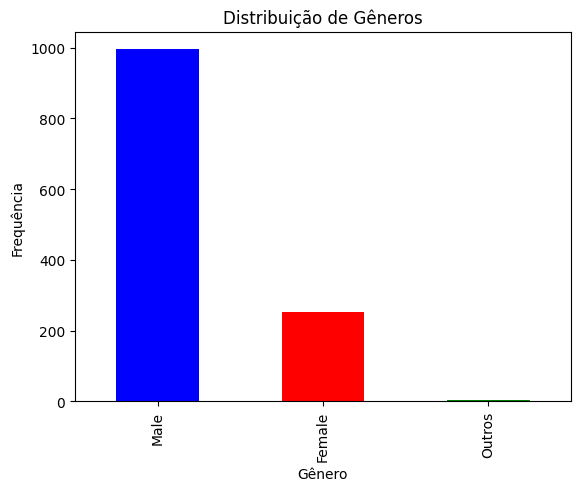

In [13]:
contagem_genero.plot(kind='bar', color=['blue', 'red', 'green'])
plt.xlabel('Gênero')
plt.ylabel('Frequência')
plt.title('Distribuição de Gêneros')
plt.show()


O que sabemos sobre essa base de dados até agora é que, a maior parte das pessoas que responderam a pesquisa tem entre 20 a 40 anos.

Além disso a maioria das pessoas é do gênero masculino.

O foco agora será abordar o indíviduo, entender onde mora e as respostas envolvendo saúde mental fora do ambito de trabalho

In [14]:
contagem_historico_familiar = df['family_history'].value_counts()
contagem_historico_familiar

family_history
No     762
Yes    489
Name: count, dtype: int64

In [15]:
contagem_busca_tratamento = df['treatment'].value_counts()
contagem_busca_tratamento

treatment
Yes    632
No     619
Name: count, dtype: int64

Em uma analise inicial, temos que 762 pessoas não tem historico familiar relacionados a condição de saúde mental, já 489 possuem.

Temos também que 632 pessoas já buscaram tratamento, enquanto que 619 não buscaram tratamento.

In [16]:
pessoas_com_historico_e_tratamento = df[(df['family_history'] == 'Yes') & (df['treatment'] == 'Yes')]

contagem_pessoas = pessoas_com_historico_e_tratamento.shape[0]

contagem_pessoas


362

In [17]:
pessoas_do_sexo_masculino_que_buscaram_tratamento_e_tem_historico = df[(df['family_history'] == 'Yes') & (df['treatment'] == 'Yes') & (df['Gender'] == 'Male')]

contagem_pessoas_masculinas = pessoas_do_sexo_masculino_que_buscaram_tratamento_e_tem_historico.shape[0]

print("Número de pessoas do sexo masculino com histórico familiar e que buscaram tratamento:", contagem_pessoas_masculinas)


Número de pessoas do sexo masculino com histórico familiar e que buscaram tratamento: 253


De 362 pessoas com histórico familiar e que buscaram tratamento, 253 são do gênero masculino.  Ou seja aproximadamente 70%.

In [18]:
contagem_pais = df['Country'].value_counts()
contagem_pais

Country
United States             746
United Kingdom            184
Canada                     72
Germany                    45
Netherlands                27
Ireland                    27
Australia                  21
France                     13
India                      10
New Zealand                 8
Italy                       7
Poland                      7
Sweden                      7
Switzerland                 7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Mexico                      3
Russia                      3
Finland                     3
Austria                     3
Denmark                     2
Greece                      2
Portugal                    2
Colombia                    2
Croatia                     2
Moldova                     1
Georgia                     1
China                       1
Thailand                    1
Cz

In [19]:
tabela_contingencia = pd.crosstab(df['Country'], df['Gender'])
print(tabela_contingencia)


Gender                  Female  Male  Outros
Country                                     
Australia                    5    16       0
Austria                      0     3       0
Belgium                      2     4       0
Bosnia and Herzegovina       0     1       0
Brazil                       0     6       0
Bulgaria                     1     3       0
Canada                      14    57       1
China                        0     1       0
Colombia                     0     2       0
Costa Rica                   0     1       0
Croatia                      0     2       0
Czech Republic               0     1       0
Denmark                      0     2       0
Finland                      0     3       0
France                       0    13       0
Georgia                      0     1       0
Germany                      2    43       0
Greece                       0     2       0
Hungary                      1     0       0
India                        2     8       0
Ireland   

In [20]:
pessoas_com_historico_e_tratamento = df[(df['family_history'] == 'Yes') & (df['treatment'] == 'Yes')]


contagem_regioes = pessoas_com_historico_e_tratamento['Country'].value_counts()

contagem_regioes


Country
United States     249
United Kingdom     40
Canada             22
Germany            13
Australia           9
Ireland             5
Netherlands         4
South Africa        3
Denmark             2
Switzerland         2
New Zealand         2
Poland              2
Sweden              1
Japan               1
Belgium             1
India               1
Brazil              1
Mexico              1
Italy               1
Croatia             1
Singapore           1
Name: count, dtype: int64


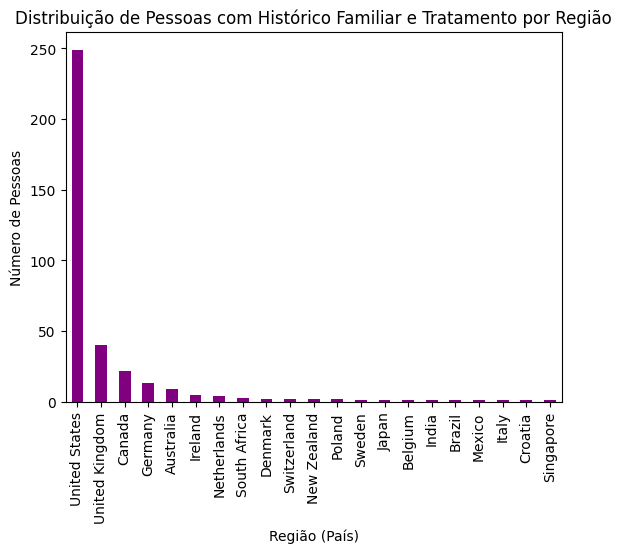

In [21]:
contagem_regioes.plot(kind='bar', color='purple')
plt.xlabel('Região (País)')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição de Pessoas com Histórico Familiar e Tratamento por Região')
plt.show()


In [22]:
contagem_estado_reside = df['state'].value_counts()
contagem_estado_reside

state
CA    138
WA     70
NY     57
TN     45
TX     44
OR     29
PA     29
IL     28
IN     27
OH     27
MI     22
MN     20
MA     20
FL     15
NC     14
VA     14
WI     12
GA     12
MO     12
UT     11
CO      9
MD      8
AL      7
AZ      7
OK      6
NJ      6
KY      5
SC      5
IA      4
CT      4
DC      4
NV      3
VT      3
SD      3
KS      3
NH      3
WY      2
NM      2
NE      2
WV      1
ID      1
MS      1
RI      1
LA      1
ME      1
Name: count, dtype: int64

In [23]:
# Filtro para pessoas com histórico familiar e que buscaram tratamento
pessoas_com_historico_e_tratamento = df[(df['family_history'] == 'Yes') & (df['treatment'] == 'Yes')]


# Tabela de contagem das regiões
contagem_estados = pessoas_com_historico_e_tratamento['state'].value_counts()
print(contagem_estados)

state
CA    51
WA    29
NY    18
TN    15
IL    13
PA    11
OR    11
IN    10
TX     9
MI     8
OH     8
MN     8
WI     6
NC     5
FL     4
AL     4
MO     3
AZ     3
GA     3
UT     3
MA     3
VA     3
MD     2
CO     2
NJ     2
NH     2
NE     1
DC     1
WY     1
SC     1
ID     1
OK     1
SD     1
IA     1
ME     1
Name: count, dtype: int64


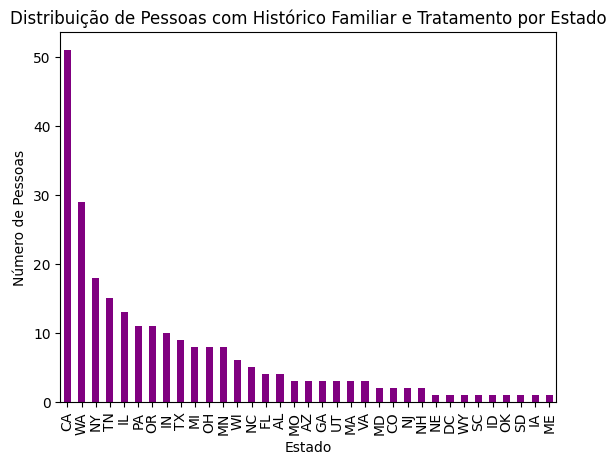

In [24]:
contagem_estados.plot(kind='bar', color='purple')
plt.xlabel('Estado')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição de Pessoas com Histórico Familiar e Tratamento por Estado')
plt.show()

Com essa sequencia de analises, notamos que 249 pessoas dos Estados Unidos responderam sim para as perguntas relacionadas a saúde mental.

Indo mais afundo, podemos observar que a maior parte das pessoas que residem nos Estados Unidos e responderam sim são dos Estados da California (51 responderam sim), Washington (29 responderam sim) e Nova York (18 responderam sim), somando obtemos 98 de 248 pessoas.

É válido destacar também a quantidade de pessoas que participaram da pesquisa e são destes 3 Estados, 138, 70, 57, respectivamente.

Ou seja, grande parcela dos individuos que responderam a pesquisa e moram nesse Estado já procuraram por tratamento e tem histórico familiar.

Vamos abordar agora a questão do ambiente de trabalho e se ele oferece os devidos suportes

In [25]:
saude_mental_compromete_o_trabalho = df['work_interfere'].value_counts()
saude_mental_compromete_o_trabalho

work_interfere
Sometimes    464
Never        212
Rarely       173
Often        140
Name: count, dtype: int64

Fazendo uma contagem para observar quantas pessoas responderam se a saúde mental interfere no trabalho

Podemos observar que a maioria das respostas foram de que influencia de alguma maneira.

In [26]:
quantidade_de_funcionarios = df['no_employees'].value_counts()
quantidade_de_funcionarios

no_employees
6-25              289
26-100            288
More than 1000    281
100-500           175
1-5               158
500-1000           60
Name: count, dtype: int64

In [27]:
tabela_contingencia = pd.crosstab(df['work_interfere'], df['no_employees'], margins=True, margins_name='Total')

print(tabela_contingencia)


no_employees    1-5  100-500  26-100  500-1000  6-25  More than 1000  Total
work_interfere                                                             
Never            22       30      53        16    44              47    212
Often            23       15      35         1    39              27    140
Rarely           22       29      29         9    41              43    173
Sometimes        71       66     111        18    94             104    464
Total           138      140     228        44   218             221    989


Observa-se que quanto maior a empresa maior a quantidade de pessoas que responderam não para a pergunta se a saúde mental interfere no trabalho.

In [28]:
empresa_oferece_beneficio = df['benefits'].value_counts()
empresa_oferece_beneficio

benefits
Yes           473
Don't know    407
No            371
Name: count, dtype: int64

In [29]:
tabela_contigencia = pd.crosstab(df['benefits'], df['no_employees'], margins=True, margins_name='Total')
tabela_contigencia

no_employees,1-5,100-500,26-100,500-1000,6-25,More than 1000,Total
benefits,,,,,,,
Don't know,32,64,114,21,98,78,407
No,109,32,73,4,132,21,371
Yes,17,79,101,35,59,182,473
Total,158,175,288,60,289,281,1251


Observamos que quanto menor a empresa, menos a chance de ela oferecer beneficios relacionados a cuidado a saúde mental. Contudo quanto maior a empresa, maiores são as probabilidades.

Analisando se as pessoas estariam dispostas a discutir problemas de saúde mental com companheiros de trabalho

In [30]:
conversa_saude_com_companheiros = df['coworkers'].value_counts()
conversa_saude_com_companheiros

coworkers
Some of them    771
No              258
Yes             222
Name: count, dtype: int64

In [31]:
genero_masculino_que_conversam_sobre_saude = df[(df['coworkers'].isin(['Yes', 'Some of them'])) & (df['Gender'] == 'Male')]

contagem = genero_masculino_que_conversam_sobre_saude.shape[0]

contagem

796

Algumas observações até agora:

Notamos que a maior parte das pessoas que tem histórico de problemas relacionados a saúde mental são do genêro masculino e a maior parte das pessoas que conversam sobre saúde mental com seus colegas de trabalho também são do gênero masculino, com isso, pode-se 'quebrar' alguns estigmas que as pessoas relacionam sobre cuidado mental com o genêro masculino.

In [32]:
saude_fisica_x_mental = df['mental_vs_physical'].value_counts()
saude_fisica_x_mental

mental_vs_physical
Don't know    574
Yes           339
No            338
Name: count, dtype: int64

Fazer uma comparação se o tamanho da empresa influencia no debate da saúde mental; e se o tamanho da empresa influencia em comportamentos negativos em relação a condições mentais

In [33]:
saude_mental_na_entrevista = df['phys_health_interview'].value_counts()
saude_mental_na_entrevista

phys_health_interview
Maybe    555
No       496
Yes      200
Name: count, dtype: int64

In [34]:
tabela_contigencia = pd.crosstab(df['phys_health_interview'], df['no_employees'], margins=True, margins_name='Total')
tabela_contigencia

no_employees,1-5,100-500,26-100,500-1000,6-25,More than 1000,Total
phys_health_interview,,,,,,,
Maybe,72,80,139,15,142,107,555
No,61,71,98,36,100,130,496
Yes,25,24,51,9,47,44,200
Total,158,175,288,60,289,281,1251


Observa-se que quanto menor a empresa mais respostas para 'sim', foram recebidas.

In [35]:
consequencia_negativa = df['obs_consequence'].value_counts()
consequencia_negativa

obs_consequence
No     1070
Yes     181
Name: count, dtype: int64

In [36]:
tabela_contigencia = pd.crosstab(df['obs_consequence'], df['no_employees'], margins=True, margins_name='Total')
tabela_contigencia

no_employees,1-5,100-500,26-100,500-1000,6-25,More than 1000,Total
obs_consequence,,,,,,,
No,129,150,248,51,263,229,1070
Yes,29,25,40,9,26,52,181
Total,158,175,288,60,289,281,1251


Observa-se também que quanto menor a empresa maiores foram as ocorrencias negativas.

### Conclusão

Com base na análise realizada dos dados da pesquisa sobre saúde mental no local de trabalho em 2014, podemos tirar algumas conclusões e observações importantes:

1. **Idade e Gênero**: A maioria dos respondentes da pesquisa era do gênero masculino, com uma idade média de cerca de 32 anos.

2. **Histórico Familiar e Busca de Tratamento**: A maioria dos participantes não tinha histórico familiar de doenças mentais, mas muitos deles buscaram tratamento para problemas de saúde mental. Isso sugere que as doenças mentais podem ser percebidas de maneira independente do histórico familiar.

3. **Localização Geográfica**: A pesquisa foi realizada principalmente nos Estados Unidos, com uma concentração significativa na Califórnia, Washington e Nova York. Portanto, as conclusões podem se aplicar principalmente a esse contexto geográfico.

4. **Ambiente de Trabalho**: A maioria dos participantes relatou que a saúde mental afetou seu trabalho. No entanto, as empresas de maior porte parecem estar menos dispostas a abordar a questão da saúde mental em entrevistas de emprego, embora sejam mais propensas a oferecer benefícios de saúde mental. 

5. **Quebra de Estigma**: É notável que a maioria dos respondentes, principalmente do gênero masculino, afirmou se sentir confortável discutindo problemas de saúde mental com seus colegas de trabalho. Isso pode refletir uma crescente quebra de estigma em relação à saúde mental no local de trabalho, especialmente em um setor como a tecnologia.

6. **Importância da Saúde Mental**: A maioria dos respondentes concordou que a saúde mental é tão importante quanto a saúde física, destacando um aumento na conscientização sobre a importância da saúde mental.